In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import lsst.daf.persistence as dafPersist
from pfs.lam.opdb import *
from pfs.lam.analysisPlot import *
from pfs.lam.detAnalysis import *

import pandas as pd
import os
import re

In [7]:
experimentId = 125
cam = "b2"
rerun = "defocus" #"dcb2"

peaklist = "../SM2-defocus/Imqual_LAM_peaklist_DCB2-notfinal.csv"

In [8]:
peaklist = os.environ['LAM_SPS_ANALYSIS_DIR']+"/notebooks/devel/fmadec/SM2-defocus/Imqual_LAM_peaklist_DCB2-notfinal.csv"


In [9]:
visitStart, visitEnd = getVisitRange(experimentId)
print(visitStart, visitEnd)

23797 23816


In [10]:
drpPath = "/drp"
repo = "sps"
basePath = '/drp/analysis/sm2/'
arm = cam[0]


In [11]:
visit = int(visitStart)

In [12]:
print(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")

butler = dafPersist.Butler(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")
rbutler = dafPersist.Butler(f"{drpPath}/{repo}/")
rbutler.getKeys('raw')
lamps = rbutler.queryMetadata('raw', ['lamps'], visit=visit, arm=arm) 
print(f"lamps used: {lamps}")
calExp = butler.get("calexp", visit=visit, arm=cam[0])

/drp/sps/rerun/defocus/detrend/
lamps used: ['HgAr']


In [13]:
peaks = pd.read_csv(peaklist)
selected_peaks = peaks[peaks.arm == arm]
selected_peaks = selected_peaks[(selected_peaks.element.str.contains('|'.join(re.findall('[A-Z][^A-Z]*', "".join(lamps)))))]

#Fiber= 10 and #wavelength= 5


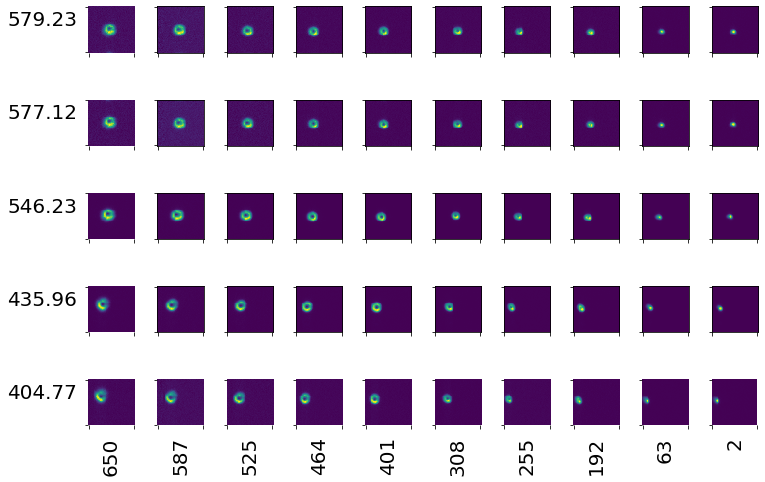

In [14]:
plotRoiPeak(calExp.image.array, selected_peaks, raw=True, roi_size=50)

In [18]:
EE = 20
doPlot = True

/software/drp/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/scipy/optimize/minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


#Fiber= 10 and #wavelength= 5


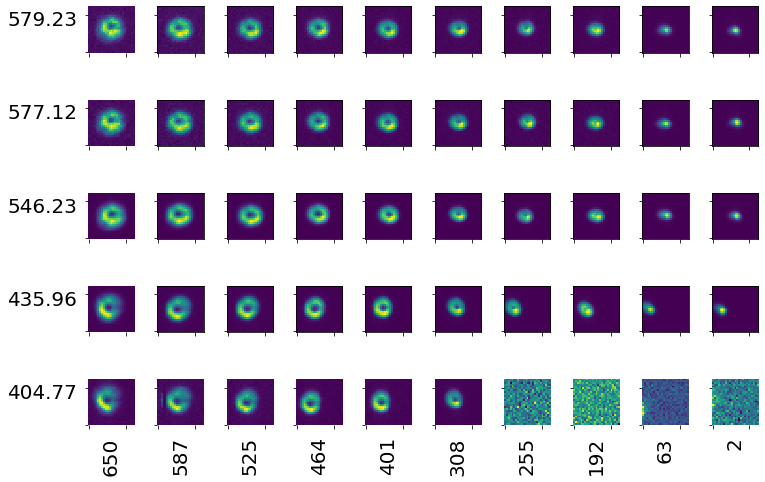

In [21]:
imdata = getImageQuality(calExp.image.array, selected_peaks,roi_size=24, EE=[EE], com=True, doPlot=doPlot)

In [22]:
imdata.fca

,objx,objy,pos,oid_x,oid_y,fwhm_x,fwhm_y,fwhm,fwhm_radius,brightness,...,skylevel,background,px,py,EE20,TotEE20,peak,fiber,wavelength,element
0,3729.266064,489.321040,0.957905,4070.594636,487.906872,138.930483,12.519351,98.636741,10,1.851009e+07,...,40.057956,0.055196,4070.594636,487.906872,0.650882,475.192749,9.0,2,404.7708,Hg
1,4433.467056,478.783870,0.915241,3689.532758,482.381425,420.561042,21.677995,297.776363,10,6.334459e+03,...,40.057956,0.055196,3689.532758,482.381425,0.473467,738.123779,9.0,63,404.7708,Hg
2,2907.846180,455.679907,0.961780,2901.817922,466.233189,22.463672,33.027379,28.243799,10,1.831604e+00,...,40.057956,0.055196,2901.817922,466.233189,0.623311,158.381897,9.0,192,404.7708,Hg
3,2778.653918,518.914165,0.964683,2426.719660,519.340487,175.332983,16.572623,124.531736,10,4.496919e+04,...,40.057956,0.055196,2426.719660,519.340487,1.516839,38.293228,9.0,255,404.7708,Hg
4,2162.313641,461.423933,0.962048,2164.343978,461.960601,6.984668,6.559788,6.775559,10,9.862556e+02,...,40.057956,0.055196,2164.343978,461.960601,0.993140,52524.343750,9.0,308,404.7708,Hg
5,1661.619728,464.156758,0.962175,1667.306152,464.129948,10.385518,6.980188,8.848220,10,4.219108e+02,...,40.057956,0.055196,1667.306152,464.129948,0.989532,50823.515625,9.0,401,404.7708,Hg
6,1272.546913,469.283394,0.962414,1279.307808,469.053660,12.628188,6.833534,10.153037,10,3.699188e+02,...,40.057956,0.055196,1279.307808,469.053660,0.985119,52297.679688,9.0,464,404.7708,Hg
7,899.028947,474.874765,0.962673,903.774450,475.376928,9.766725,11.157587,10.485244,10,1.758254e+02,...,40.057956,0.055196,903.774450,475.376928,0.993666,22926.253906,9.0,525,404.7708,Hg
8,515.188013,483.485971,0.963070,520.891330,483.899627,3.094192,13.332293,9.677914,10,2.137222e+02,...,40.057956,0.055196,520.891330,483.899627,0.985569,22614.679688,9.0,587,404.7708,Hg
9,122.531679,493.777691,0.944726,128.432569,493.860234,3.651344,12.968246,9.526482,10,4.555161e+02,...,40.057956,0.055196,128.432569,493.860234,0.984810,48650.367188,9.0,650,404.7708,Hg
